In [1]:
import contextlib
import random

from keyname import keyname as kn
from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
import patchworklib as pw
from scipy import stats
import seaborn as sns
from slugify import slugify
from teeplot import teeplot as tp
import itertools as it
import matplotlib.patheffects as pe


<Figure size 72x72 with 0 Axes>

In [2]:
np.random.seed(1)
random.seed(1)


In [3]:
from conduitpylib.viz import (
    runtime_indicators_concat_regplot_pairplot,
    runtime_indicators_pairplot,
    runtime_indicators_regplot,
)
from conduitpylib.wrangle import (
    retrieve_and_prepare_delta_dataframes,
    wrangle_instrumentation_longform,
)
from _rename_allocation import rename_allocation


In [4]:
nbm.print_metadata()


context: ci
hostname: e33758a6b389
interpreter: 3.8.10 (default, Nov 22 2023, 10:22:35)  [GCC 9.4.0]
nbcellexec: 4
nbname: None
nbpath: None
revision: null
session: 6b1844fd-ae14-4c9d-97ad-4c380be37502
timestamp: 2023-11-30T19:10:11Z00:00


IPython==7.16.1
keyname==0.5.6
yaml==5.4.1
matplotlib==3.5.2
nbmetalog==0.2.6
numpy==1.23.5
pandas==1.1.2
patchworklib==0.6.3
scipy==1.5.4
seaborn==0.13.0
teeplot==0.6.1
re==2.2.1
ipython_genutils==0.2.0
logging==0.5.1.2
zmq==22.2.1
json==2.0.9
six==1.15.0
ipykernel==5.5.3


# Get Data


In [5]:
longitudinal_df, snapshot_df = retrieve_and_prepare_delta_dataframes(
    df_inlet_url="https://osf.io/jgpnv/download",
    df_outlet_url="https://osf.io/ncdfq/download",
    treatment_column="Allocation",
)


a: df_inlet
digest: f5e773e930982d7a2fa6fe51fcbaaee0d1b08a120f140662bc07d0d537da37d3
num cols: 45
num cols all na: 2
num cols any na: 2
num na: 133120
num rows: 66560
num rows all na: 0
num rows any na: 66560
size: 62M

a: df_outlet
digest: ce7c97600d27e972d19d35c0e30021716f4f553dab5763d3c29bf5010f75b8cb
num cols: 71
num cols all na: 6
num cols any na: 6
num na: 399360
num rows: 66560
num rows all na: 0
num rows any na: 66560
size: 75M



# Compare Finalized and Rolling Measures


teeplots/./allocation=sans-lac-417+compare=instrumentation+comparison-x=longitudinal+comparison-y=snapshot+viz=runtime-indicators-regplot+ext=.pdf
skipping teeplots/./allocation=sans-lac-417+compare=instrumentation+comparison-x=longitudinal+comparison-y=snapshot+viz=runtime-indicators-regplot+ext=.png
teeplots/./allocation=sans-lac-417+hue=instrumentation+viz=runtime-indicators-pairplot+ext=.pdf
skipping teeplots/./allocation=sans-lac-417+hue=instrumentation+viz=runtime-indicators-pairplot+ext=.png


<Figure size 432x288 with 0 Axes>

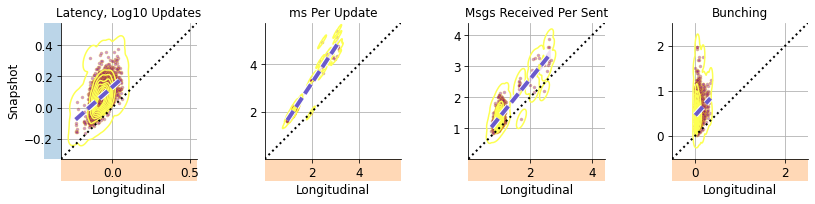

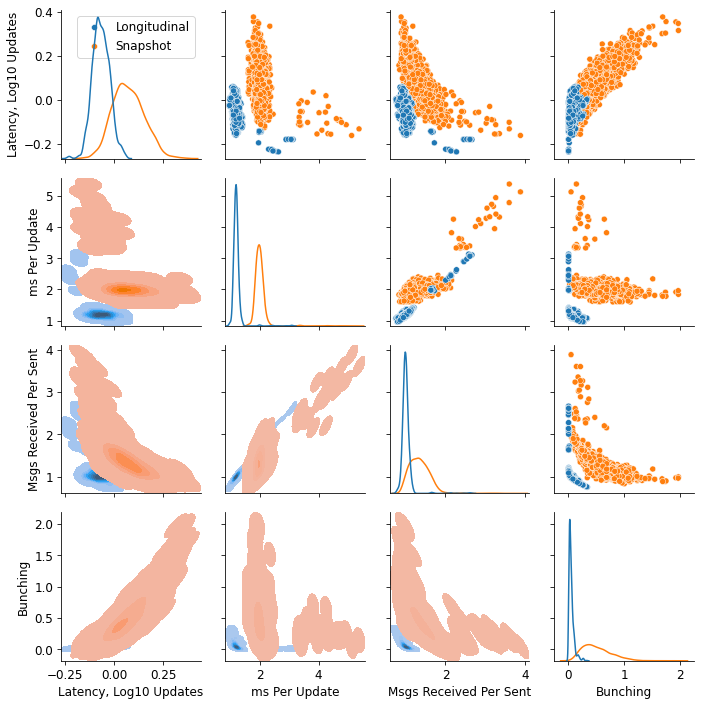

teeplots/./allocation=with-lac-417+compare=instrumentation+comparison-x=longitudinal+comparison-y=snapshot+viz=runtime-indicators-regplot+ext=.pdf
skipping teeplots/./allocation=with-lac-417+compare=instrumentation+comparison-x=longitudinal+comparison-y=snapshot+viz=runtime-indicators-regplot+ext=.png
teeplots/./allocation=with-lac-417+hue=instrumentation+viz=runtime-indicators-pairplot+ext=.pdf
skipping teeplots/./allocation=with-lac-417+hue=instrumentation+viz=runtime-indicators-pairplot+ext=.png


<Figure size 432x288 with 0 Axes>

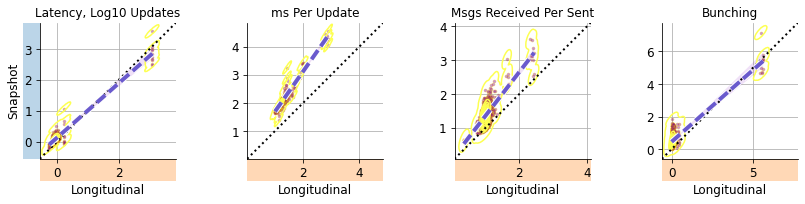

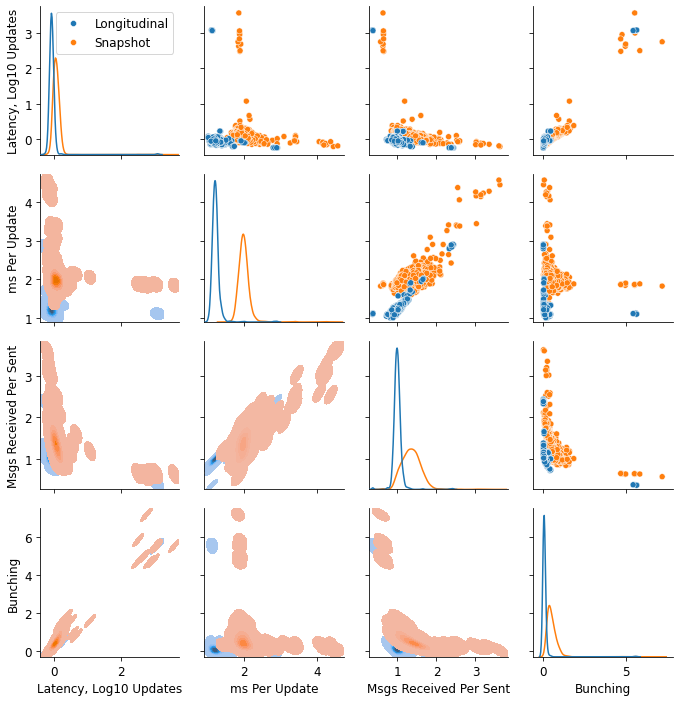

skipping teeplots/./allocation=sans-lac-417+compare=instrumentation+comparison-x=longitudinal+comparison-y=snapshot+viz=runtime-indicators-regplot+ext=.pdf
skipping teeplots/./allocation=sans-lac-417+compare=instrumentation+comparison-x=longitudinal+comparison-y=snapshot+viz=runtime-indicators-regplot+ext=.png
skipping teeplots/./allocation=sans-lac-417+hue=instrumentation+viz=runtime-indicators-pairplot+ext=.pdf
skipping teeplots/./allocation=sans-lac-417+hue=instrumentation+viz=runtime-indicators-pairplot+ext=.png
teeplots/./allocation=sans-lac-417+viz=runtime-indicators-concat-regplot-pairplot+ext=.pdf
skipping teeplots/./allocation=sans-lac-417+viz=runtime-indicators-concat-regplot-pairplot+ext=.png


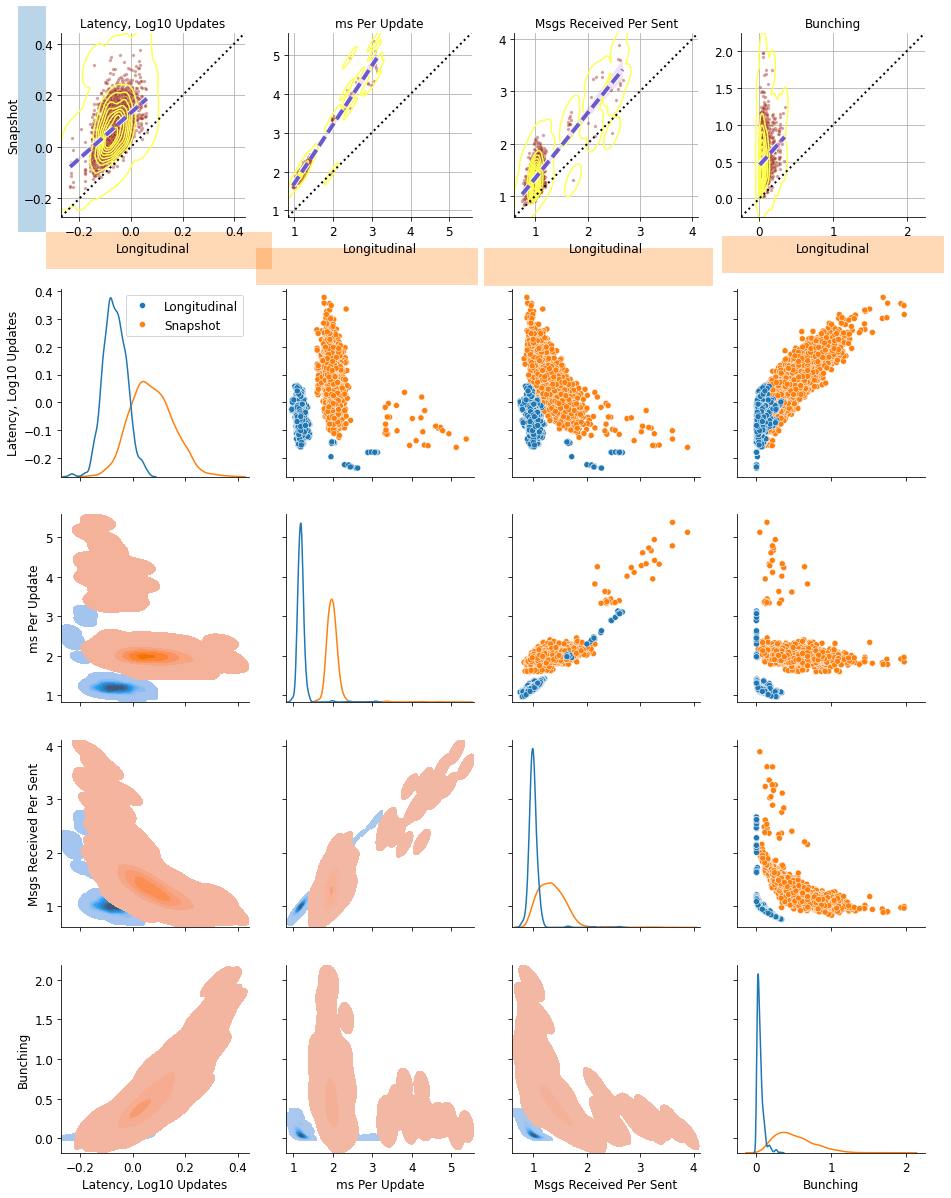

skipping teeplots/./allocation=with-lac-417+compare=instrumentation+comparison-x=longitudinal+comparison-y=snapshot+viz=runtime-indicators-regplot+ext=.pdf
skipping teeplots/./allocation=with-lac-417+compare=instrumentation+comparison-x=longitudinal+comparison-y=snapshot+viz=runtime-indicators-regplot+ext=.png
skipping teeplots/./allocation=with-lac-417+hue=instrumentation+viz=runtime-indicators-pairplot+ext=.pdf
skipping teeplots/./allocation=with-lac-417+hue=instrumentation+viz=runtime-indicators-pairplot+ext=.png
teeplots/./allocation=with-lac-417+viz=runtime-indicators-concat-regplot-pairplot+ext=.pdf
skipping teeplots/./allocation=with-lac-417+viz=runtime-indicators-concat-regplot-pairplot+ext=.png


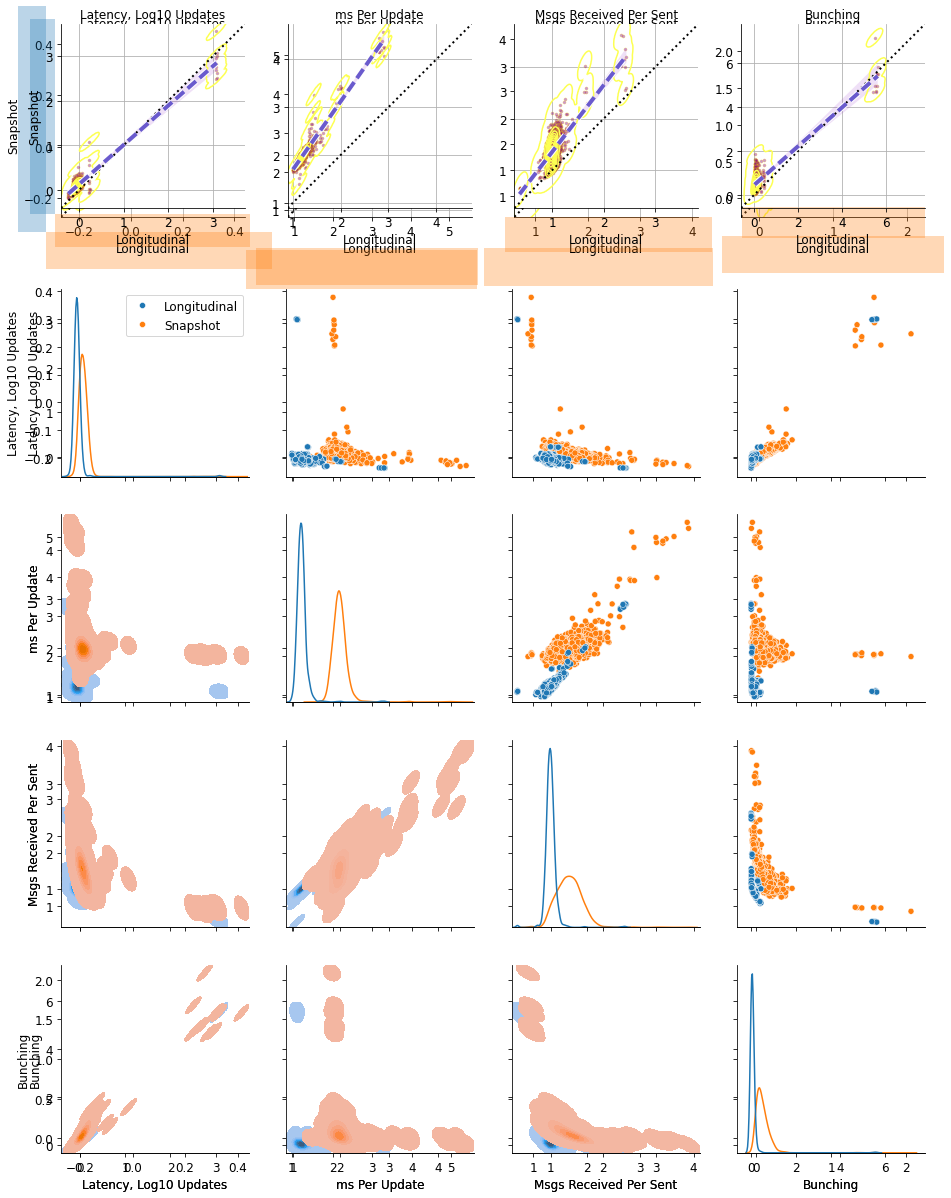

<Figure size 432x288 with 0 Axes>

In [6]:
data = wrangle_instrumentation_longform(
    longitudinal_df=longitudinal_df,
    snapshot_df=snapshot_df,
)

patchwork_context = pw.patched_axisgrid
for context in contextlib.nullcontext, patchwork_context:
    for allocation, group in data.groupby("Allocation"):
        plt.clf()
        with context():
            group_df = group.reset_index()
            regplot_facetgrid = tp.tee(
                runtime_indicators_regplot,
                data=rename_allocation(group_df),
                compare="Instrumentation",
                comparison_x="Longitudinal",
                comparison_y="Snapshot",
                teeplot_outattrs={
                    "allocation": slugify(allocation),
                },
                teeplot_save=(context is not patchwork_context),
            )
            pairplot_grid = tp.tee(
                runtime_indicators_pairplot,
                data=rename_allocation(group_df),
                hue="Instrumentation",
                teeplot_outattrs={
                    "allocation": slugify(allocation),
                },
                teeplot_save=(context is not patchwork_context),
            )

            if context is patchwork_context:
                tp.tee(
                    runtime_indicators_concat_regplot_pairplot,
                    regplot_facetgrid,
                    pairplot_grid,
                    teeplot_outattrs={
                        "allocation": slugify(allocation),
                    },
                )

            plt.show()
            plt.clf()
